In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()

my_cmap = sns.diverging_palette(600,10,center='dark', as_cmap=True)

In [31]:
X1 = np.array([1,1,0,0.5,4,6,5,5.5])
X2 = np.array([3,3.5,4,4.2,1,0.5,0,1.2])

In [32]:
df = pd.DataFrame({'X1': X1,"X2":X2})

In [33]:
df

,X1,X2
0,1.0,3.0
1,1.0,3.5
2,0.0,4.0
3,0.5,4.2
4,4.0,1.0
5,6.0,0.5
6,5.0,0.0
7,5.5,1.2


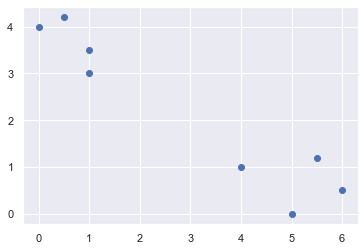

In [34]:
plt.scatter(X1,X2)

In [36]:
y = np.random.choice(2,8);y

array([0, 0, 1, 1, 1, 1, 1, 0])

In [37]:
df["label"] = pd.Series(y);df

,X1,X2,label
0,1.0,3.0,0
1,1.0,3.5,0
2,0.0,4.0,1
3,0.5,4.2,1
4,4.0,1.0,1
5,6.0,0.5,1
6,5.0,0.0,1
7,5.5,1.2,0


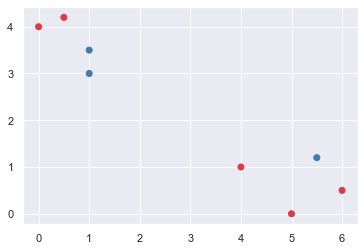

In [38]:
plt.scatter(x = df["X1"], y = df["X2"], c=df["label"], cmap = my_cmap)

In [39]:
c0 = np.array([0,0])
i0 = 0
c1 = np.array([0,0])
i1 = 0
for index, row in df.iterrows():
    if (int(row['label']) == 0):
        c0 = c0 + [row['X1'],row['X2']]
        i0 = i0 + 1
    else:
        c1 = c1 + [row['X1'],row['X2']]
        i1 = i1 + 1
print(c0,c1)
c0 = c0/i0
c1 = c1/i1

[7.5 7.7] [15.5  9.7]


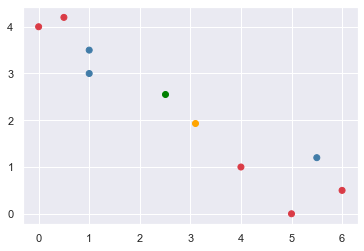

In [40]:
plt.scatter(x = df["X1"], y = df["X2"], c=df["label"],cmap=my_cmap)
plt.scatter(c0[0],c0[1],c='green')
plt.scatter(c1[0],c1[1],c='orange')

In [41]:
new_y = y

In [42]:
old_y = new_y
new_y = np.array([])
for index, row in df.iterrows():
    dist0 = np.linalg.norm(np.array([row['X1'],row['X2']])-c0)
    dist1 = np.linalg.norm(np.array([row['X1'],row['X2']])-c1)
    if dist0 <= dist1:
        new_y = np.append(new_y,0)
    else:
        new_y = np.append(new_y,1)
new_y

array([0., 0., 0., 0., 1., 1., 1., 1.])

In [43]:
df['label'] = new_y

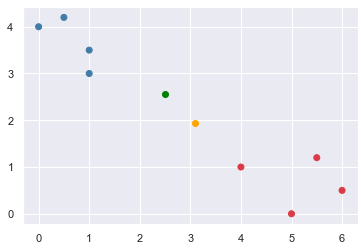

In [44]:
plt.scatter(x = df["X1"], y = df["X2"], c=df["label"], cmap = my_cmap)
plt.scatter(c0[0],c0[1],c='green')
plt.scatter(c1[0],c1[1],c='orange')

In [15]:
#Problem 2

In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
sns.set(rc={'axes.facecolor':sns.xkcd_rgb["gunmetal"]})

my_cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
# sns.palplot(sns.diverging_palette(250, 5, n=15))

X1 = np.random.normal(0, 2,size=(25, 50))
X2 = np.random.normal(1, 2, size=(25, 50))
X3 = np.random.normal(2, 2, size=(25, 50))
y = np.repeat([1, 2, 3], 75)
X = np.concatenate((X1, X2, X3))

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_std = StandardScaler().fit_transform(X)
pca.fit(X_std)
# print(pca.components_)
X_pca = pca.transform(X_std)
df = pd.DataFrame({'p1':X_pca[:,0],'p2':X_pca[:,1]})
y = np.concatenate((np.repeat([1],25),np.repeat([2],25),np.repeat([3],25)))
df['labels'] = pd.Series(y)

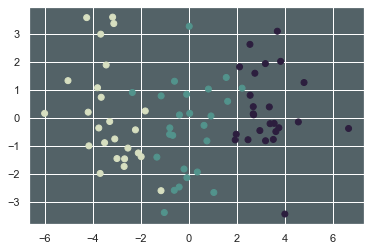

In [18]:
plt.scatter(x=df['p1'],y=df['p2'],c=y,cmap=my_cmap)

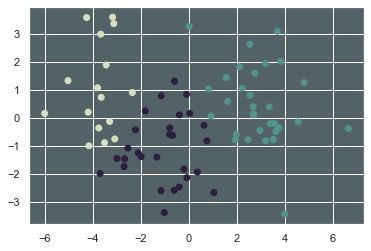

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

new_y = kmeans.predict(X_pca)
plt.scatter(x=df['p1'],y=df['p2'],c=new_y,cmap=my_cmap)

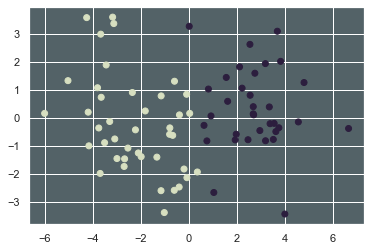

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)

new_y = kmeans.predict(X_pca)
plt.scatter(x=df['p1'],y=df['p2'],c=new_y,cmap=my_cmap)

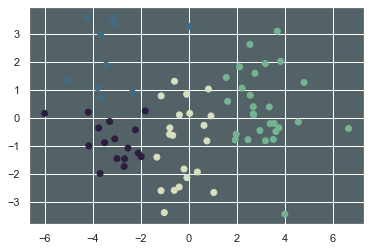

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)

new_y = kmeans.predict(X_pca)
plt.scatter(x=df['p1'],y=df['p2'],c=new_y,cmap=my_cmap)

In [22]:
#Problem 3

In [23]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()

my_cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)

In [24]:
X1 = []
for i in range(30):
    #t1 in (-pi/8,pi/8), p1 in (0,2pi)
    t1 = np.random.random_sample()*math.pi/4.0 - math.pi/8
    p1 = np.random.random_sample()*math.pi*2
    x1 = math.sin(t1)*math.cos(p1) + np.random.normal(scale=0.5)
    y1 = math.sin(t1)*math.sin(p1) + np.random.normal(scale=0.5)
    z1 = math.cos(t1) + np.random.normal(scale=0.5)
    X1.append([t1,p1,x1,y1,z1])

X2 = []
for i in range(30):
    #t2 in (pi/4,3pi/4), p2 in (-pi/4,pi/4)
    t2 = np.random.random_sample()*math.pi/2.0 + math.pi/4
    p2 = np.random.random_sample()*math.pi/2.0 - math.pi/4
    x2 = math.sin(t2)*math.cos(p2) + np.random.normal(scale=0.5)
    y2 = math.sin(t2)*math.sin(p2) + np.random.normal(scale=0.5)
    z2 = math.cos(t2) + np.random.normal(scale=0.5)
    X2.append([t2,p2,x2,y2,z2])

X3 = []
for i in range(30):
    #t3 in (pi/4,3pi/4), p3 in (pi/4,3pi/4)
    t3 = np.random.random_sample()*math.pi/2.0 + math.pi/4
    p3 = np.random.random_sample()*math.pi/2.0 + math.pi/4
    x3 = math.sin(t3)*math.cos(p3) + np.random.normal(scale=0.5)
    y3 = math.sin(t3)*math.sin(p3) + np.random.normal(scale=0.5)
    z3 = math.cos(t3) + np.random.normal(scale=0.5)
    X3.append([t3,p3,x3,y3,z3])

y = np.repeat([1,2,3],30)
X = X1+X2+X3

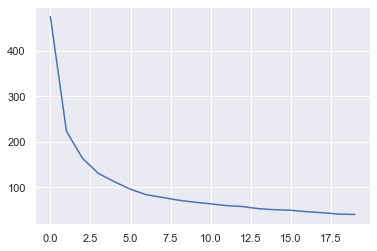

In [25]:
from sklearn.cluster import KMeans

inerts = []
for i in range(20):
    kmean = KMeans(n_clusters=i+1)
    kmean.fit(X)

    labels = kmean.predict(X)
    inerts.append([i+1,kmean.inertia_])
# plt.scatter(x=np.array(inerts)[:,0],y=np.array(inerts)[:,1])
plt.plot(np.array(inerts)[:,1])

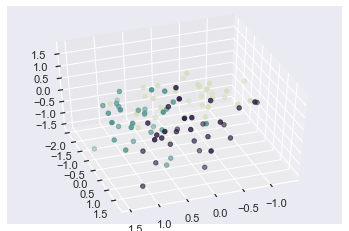

In [26]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

ax.view_init(45, 70)

xdata = np.array(X)[:,2]
ydata = np.array(X)[:,3]
zdata = np.array(X)[:,4]
ax.scatter3D(xdata, ydata, zdata, c=y, cmap=my_cmap)

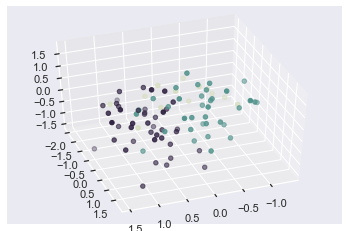

In [27]:
kmean = KMeans(n_clusters=3)
kmean.fit(X)

labels = kmean.predict(X)
inerts.append([3,kmean.inertia_])


ax = plt.axes(projection='3d')

ax.view_init(45, 70)

ax.scatter3D(xdata, ydata, zdata, c=labels, cmap=my_cmap)

In [28]:
s1 = np.array(labels - y)[:30]
s1 = s1 - np.repeat(max(set(s1), key=list(s1).count),30)
s2 = np.array(labels - y)[30:60]
s2 = s2 - np.repeat(max(set(s2), key=list(s2).count),30)
s3 = np.array(labels - y)[60:90]
s3 = s3 - np.repeat(max(set(s3), key=list(s3).count),30)

ldiff = list(s1) + list(s2) + list(s3)
ldiff = list(map(lambda x: 0 if x==0 else 1,ldiff))
ldiff = np.reshape(ldiff, 90);ldiff

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1])

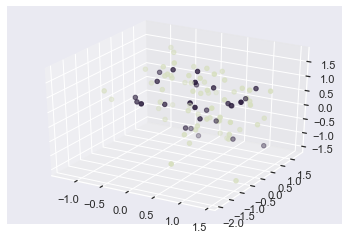

In [29]:
kmean = KMeans(n_clusters=3)
kmean.fit(X)

labels = kmean.predict(X)
inerts.append([3,kmean.inertia_])


ax = plt.axes(projection='3d')

# ax.view_init(45, 70)

ax.scatter3D(xdata, ydata, zdata, c=ldiff, cmap=my_cmap)